# Lab 2:  Problem 2

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()

We want to solve the fixed point system $x = f(x)$ where $f(x) = \cos(0.5\pi x)+1$, using a fixed point iteration. Verify that $x=1$ is a solution to this fixed point system. 

**a)** Explain (with less than three sentences) why $[0,2]$ is a natural choice of a domain for a fixed point iteration for solving $x = f(x)$. 

<font color='blue'>
    
   Solution: 

</font>
cos$\big(ax\big)\in [-1, 1] \forall x, c\in\mathbb{R}$, in this case cos$\big(0.5\pi x\big)\in [-1, 1] \forall x\in [0, 2]$.<br> 
So $f(x)\in [0, 2] \forall x \in\mathbb{R}$, more precisely $f(x)\in [0, 2] \forall x \in [0, 2]$.<br>
Making $[0, 2]$ the only domain of $x$ values that admits a solution to $x=f(x)$

**b)** Fixed point iterations. Write a function which runs a fixed point iteration for $f$ and returns the sequence of iterations $[x_0, x_1, x_2, \ldots, x_n]$. Using initial point $x_0 = 0.1$, plot the evolution of the error as a function of the number of iterations. Does the iteration seem to converge?

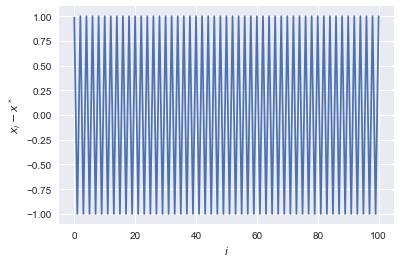

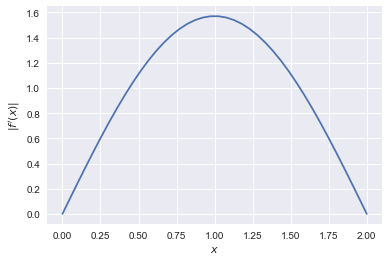

In [67]:
def banach_fp(f, x0, n, p=0):
    # f: the function for which to solve x=f(x)
    # x0: initial value
    # n: number of iterations
    # p: default 0, to be used when solving x=g(x)
    x_temp = f(x0, p)
    x_vals = []
    x_vals.append(x_temp)
    for i in range(n):
        x_temp = f(x_temp, p)
        x_vals.append(x_temp)
        
    return np.array(x_vals)

iterations = 100
f = lambda x,p: np.cos(0.5*np.pi*x) + 1
x_0 = 0.1
x_ex = 1.0
f_der = lambda x: -0.5*np.pi*np.sin(0.5*np.pi*x)
x_vals = banach_fp(f,x_0, iterations)
plt.plot(x_vals - np.ones(101))
plt.ylabel(r'$x_i-x^*$')
plt.xlabel(r'$i$')
plt.show()

plt.plot(np.linspace(0, 2, 40), 
         [np.abs(f_der(x)) for x in np.linspace(0, 2, 40)])
plt.ylabel(r"$|f'(x)|$")
plt.xlabel(r'$x$')
plt.show()


<font color='blue'>
    
   Your comments here: 

</font><br>
According to theorem 6.1 in $\textbf{YEB}$, one of the properties of $f'(x)$ needed to guarantee a unique fixed point in $[0,2]$ is  $$\exists K < 1: \big|f'(x)\big|\leq K \quad\forall x\in [0,2]$$
As seen from the plot of $\big|f'(x)\big|$, this condition is not met $\forall x\in[0,2]$, and the fix point iteration will not converge to the actual fix point $x=1$, but instead oscillate between $0$ and $2$.

As you hopefully observed in the previous subproblem, not all fixed point iterations will converge. However, we can in some cases modify the fixed point iteration such that it converges. If we for example add some constant or variable to both sides, the solution does not change. Therefore, let $p$ be some parameter, and add $px$ to both sides of our system to obtain

$$ x + px = \cos(0.5\pi x) + 1 + px $$

Verify for yourselves that this can be rewritten into

$$ x = \frac{1}{1+p} \big( \cos(0.5\pi x) + 1 + px \big) =: g(x) $$

We will in the following assume $p\geq0$.

**b)** Modify your code to run the fixed point iteration to run $x_{n+1} = g(x_n)$. Test different values of $0\leq p\leq 2$. Which values of $p$ seem to give convergence?

*Hint*: If you followed the template above, you can reuse the banach_fp function and just change the function $f$.

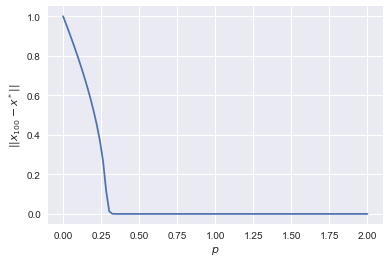

In [68]:
g = lambda x,p: 1/(1+p)*(np.cos(0.5*np.pi*x) + p*x + 1)
iters = 100
p_list = np.linspace(0, 2, iters)
err = []

for p_val in p_list:
    err.append(np.abs(banach_fp(g, x_0, 100, p=p_val)[-1]-1))

plt.plot(p_list, err)
plt.xlabel(r'$p$')
plt.ylabel(r'$||x_{{{0}}}-x^*||$'.format(iters))
plt.show()

<font color='blue'>
    
   Your comments here: 

</font><br>
Values of $p\geq0.3$ seem to give convergence, as $x_{100}\rightarrow x^*$<br>
If we use the condition stated in 1a) to determine $p$, we are faced with minimizing $p$, given by
$$
\text{min}_{p\geq0} \bigg|\frac{1}{1+p}\bigg(p-\frac{\pi}{2}\text{sin}\Big(\frac{\pi}{2}x\Big)\bigg)\bigg| < 1\quad x\in[0,2]
$$
solving this gives $p\geq\pi-\frac{1}{2}\approx 0.285$ 

The approximate value of $p\geq0.3$ from looking at the plot is not far off the minimum value of $p$ found above.

In [69]:
# If we the number of iterations are high, we see that a p value just above 0.285 gives convergence, and a p value just below
# 0.285 does not converge
print(1-banach_fp(g, x_0, 20000, p=0.289)[-1])
print(1-banach_fp(g, x_0, 20000, p=0.281)[-1])

-2.398081733190338e-14
-0.11679168342548141


**c)** Test $p=0.5,1,1.5$ and $2$ and make a convergence plot. Additionally, give a rough estimate of the convergence rate of the method.  

*Hint:* For fixed point iterations, the error is in general of the form $\|x_n-x^\ast\| = \mathcal O(q^n)$, where $q$ determines the order of convergence. Plot lines of the form $l(n) \propto q^n$ and experiment to find values of $q$ which corresponds to the convergence plots for the fixed point iterations.

In [70]:
iters = 40
err0 = abs(x_0-x_ex)
df = pd.DataFrame({'p = 0.5': err0 + np.empty(iters),'p = 1.0': err0 + np.empty(iters), 
                   'p = 1.5': err0 + np.empty(iters), 'p = 2.0': err0 + np.empty(iters)})

for p_val in [0.5, 1.0, 1.5, 2.0]:
    for n_iter in range(iters):
        last_val = banach_fp(g, 0.1, n_iter, p=p_val)[-1]
        df['p = ' + str(p_val)][n_iter + 1] = np.abs(last_val - 1.0)


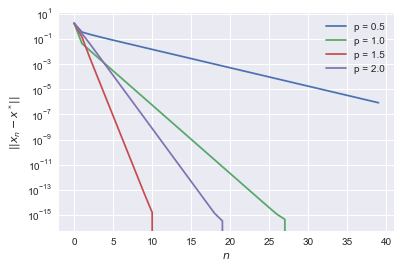

In [71]:
ax = df.plot(kind='line', logy=True)
ax.set_ylabel(r'$||x_n-x^*||$')
ax.set_xlabel(r'$n$')
ax

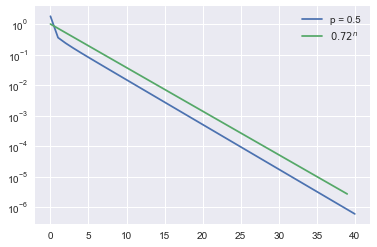

In [72]:
q = 0.72
plt.plot(df['p = 0.5'], label='p = 0.5')
plt.plot([q**n for n in range(40)], label=r'${}^n$'.format(q))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

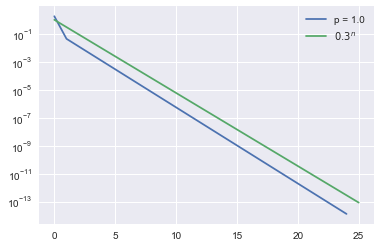

In [73]:
q = 0.3
plt.plot(df['p = 1.0'][:25], label='p = 1.0')
plt.plot([q**n for n in range(26)], label=r'${}^n$'.format(q))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

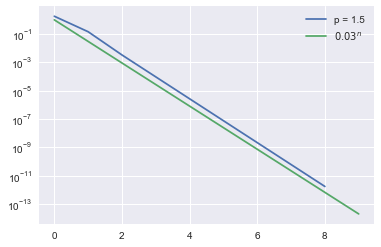

In [74]:
q = 0.03
plt.plot(df['p = 1.5'][:9], label='p = 1.5')
plt.plot([q**n for n in range(10)], label=r'${}^n$'.format(q))
plt.legend(loc='best')
plt.yscale('log')
plt.show()
                     

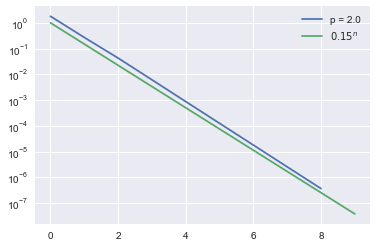

In [75]:
q = 0.15
plt.plot(df['p = 2.0'][:9], label='p = 2.0')
plt.plot([q**n for n in range(10)], label=r'${}^n$'.format(q))
plt.legend(loc='best')
plt.yscale('log')
plt.show()

<font color='blue'>
Fill in your observed convergence rates in the following table:
</font>

| $p$ | $q$  |
|:---:|:----:|
| 0.5 |  0.72    |
| 1.0 |  0.3    |
| 1.5 |  0.03    |
| 2.0 |  0.15    |

**d)** Show that the Lipschitz constant for $g$ with domain $[0,2]$ is given by 
$$ L = \frac{1}{1+p}\max\{p,0.5\pi-p\}. $$

*Hint:* Recall that for continuously differentiable, real-valued functions g, and compact domains $D$, the Lipschitz constant is given by
$$ L = \max_{x\in D} | g'(x) |. $$
You might also find the property $|x| = \max\{x,-x\}$ helpful in solving this problem.

<font color='blue'>
Solution:
</font> <br>
Let $x\in D = [0, 2]$
$$
\begin{aligned}
L &= \text{max}_{x\in D}\big|g'(x)\big|\\
  &= \text{max}_{x\in D}\bigg|\frac{1}{1+p}\bigg(p-\frac{\pi}{2}\text{sin}\Big(\frac{\pi}{2} x\Big)\bigg)\bigg|
\end{aligned}
$$
Now use the fact that $$ |x| = \text{max}\{x,-x\}$$ this gives
$$
\begin{aligned}
L &= \frac{1}{1+p}\text{max}_{x\in D}\bigg\{p-\frac{\pi}{2}\text{sin}\Big(\frac{\pi}{2} x\Big), \frac{\pi}{2}\text{sin}\Big(\frac{\pi}{2} x\Big)-p\bigg\}\\
  &= \frac{1}{1+p}\text{max}\bigg\{p, \frac{\pi}{2} - p\bigg\}
\end{aligned}
$$
As $0\leq\frac{\pi}{2}\text{sin}\Big(\frac{\pi}{2} x\Big)\leq 1 \forall x\in D$

The Banach fixed point theorem tells us that $\|x_{n+1} - x^\ast\| \leq L\|x_n - x^\ast\|$. In particular, this means that $\|x_n - x^\ast\| = \mathcal O(L^n)$. 

**e)** Compute $L$ and $g'(1)$ for $p = 0.5,1,1.5$ and $2$ and compare with the order of convergence you observed in problem **2c**. What do you observe?

In [76]:
L = lambda p: (1/(1 + p)*max(p, 0.5*np.pi - p))
g_der = lambda x,p: (1/(1 + p))*(p - 0.5*np.pi*np.sin(0.5*np.pi*x))

for p in [0.5, 1.0, 1.5, 2.0]:
    print("p: {:01.1f} \t L: {:01.3f} \t |g'(1)|: {:01.3f}".
          format(p, L(p), np.abs(g_der(1, p))))

p: 0.5 	 L: 0.714 	 |g'(1)|: 0.714
p: 1.0 	 L: 0.500 	 |g'(1)|: 0.285
p: 1.5 	 L: 0.600 	 |g'(1)|: 0.028
p: 2.0 	 L: 0.667 	 |g'(1)|: 0.143


<font color='blue'>
    
Fill out the following table:
</font>

| $p$ | $L$  | $|g'(1)|$ | $q$  |
|:---:|:----:|:-------:|:----:|
| 0.5 |  0.714   |    0.714    |  0.72   |
| 1.0 |  0.5   |    0.285    |  0.3   |
| 1.5 |  0.6   |    0.028    |  0.03   |
| 2.0 |  0.667   |    0.143    |  0.15   |

<font color='blue'>
Your comments here:
</font><br>
We observe that the approximate convergence rates are very close to the computed values of $|g'(1)|$, called the asymptotic convergence factor, and by Ostrowski's theorem if $|g'(x^*)|<1$ the fix point iteration will converge to the fixed point $x^*$ (the condition of $g(x)$ to be continuous and differentiable in a neighbourhood $J$ of $x^*$ are met). As is the case in this example, and we see that $q\leq L$ for all the four values of $p$, making $g(x)$ a contraction mapping and in correspondence with Banach's fixed point theorem, $g$ admits a unique fixed point $x^*$ in $[0, 2]$.
